# Trabajo Sprint 3: Procesamiento de lenguaje natural

## Dataset: The Multilingual Amazon Reviews Corpus

Se puede encontrar el dataset [aquí](https://github.com/kang205/SASRec) y su [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt).

El conjunto de datos contiene comentarios en español, recopiladas entre el 1 de noviembre de 2015 y el 1 de noviembre de 2019. Y además, presenta las siguientes características:

- `review_id`: ID del comentario.
- `product_id`: ID del producto.
- `reviewer_id`: ID de un revisor.
- `stars`: número de estrellas asignadas al comentario.
- `review_body`: texto del comentario.
- `review_title`: título del comentario.
- `language`: idioma del comentario.
- `product_category`: categoría general del producto.

## Objetivo

Implementar un modelo que dependiendo de la crítica de un producto, asigne la cantidad de estrellas correspondiente. La calificacion es entre el rango 1-5

## Importamos librerias y datasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
import re
from nltk.util import ngrams
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
dataset = pd.read_json('Dataset_es_dev.json', lines=True)

In [13]:
dataset

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty
...,...,...,...,...,...,...,...,...
4995,es_0179515,product_es_0158275,reviewer_es_0273644,5,Me ha encantado la cesta. Ha llegado impecable...,guadalupe,es,home
4996,es_0894902,product_es_0953259,reviewer_es_0153773,5,Desempeña su función correctamente,calidad precio,es,camera
4997,es_0760496,product_es_0731995,reviewer_es_0171091,5,Me ha encantado la diadema! Las flores son tal...,Excelente,es,toy
4998,es_0178380,product_es_0402051,reviewer_es_0686937,5,"A mi me gustan mucho las fundas TPU, ya que so...",Genial,es,wireless


In [14]:
dataset1 = pd.read_json('Dataset_es_test.json', lines=True)
dataset1

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase
...,...,...,...,...,...,...,...,...
4995,es_0685611,product_es_0919143,reviewer_es_0461769,5,Para lo que cuesta es perfecto porque cumple s...,Perfectos para lo que sirven,es,wireless
4996,es_0638242,product_es_0636134,reviewer_es_0214562,5,"Material muy flexible y cómodo, acorde a la de...","Buen vendedor, rápido y fiable.",es,wireless
4997,es_0760108,product_es_0078583,reviewer_es_0043609,5,Se ve bien el grabado,medallas con bonito grabado,es,home
4998,es_0070806,product_es_0359350,reviewer_es_0258717,5,lo compré para mi bici pero finalmente se lo h...,timbre,es,sports


In [15]:
dataset2 = pd.read_json('Dataset_es_train.json', lines=True)
dataset2

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes
...,...,...,...,...,...,...,...,...
199995,es_0715276,product_es_0317036,reviewer_es_0643604,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,es,electronics
199996,es_0085190,product_es_0622919,reviewer_es_0466173,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,es,electronics
199997,es_0484496,product_es_0358101,reviewer_es_0330744,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,es,apparel
199998,es_0930141,product_es_0788855,reviewer_es_0694290,5,Perfecto para el cumple de mi hijo,Recomendado,es,toy


Contamos con tres datasets, dos de ellos contienen 5000 instancias y el tercero 200000 instancias, todos tienen 8 columnas y son iguales para todos los datasets

In [16]:
 #frames = [dataset,dataset1]
 #df_base = pd.concat(frames)
 #df_base.shape

## Definimos el primer dataset para trabajar, usaremos el de 200000 instancias

In [17]:
df_base= dataset2.copy()
df_base= dataset2.dropna()
df_base= dataset2.reset_index()
df_base.head()

,index,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


In [18]:
df_base=df_base.drop(columns=["review_id"])

In [19]:
df_base.shape

(200000, 8)

## Procedemos a hacer un analisis exploratorio de los datos

### Vemos informacion general, si tiene faltantes y los datos estadisticos relevantes

In [20]:
#Información general de los datos
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   index             200000 non-null  int64 
 1   product_id        200000 non-null  object
 2   reviewer_id       200000 non-null  object
 3   stars             200000 non-null  int64 
 4   review_body       200000 non-null  object
 5   review_title      200000 non-null  object
 6   language          200000 non-null  object
 7   product_category  200000 non-null  object
dtypes: int64(2), object(6)
memory usage: 12.2+ MB


In [21]:
df_base.isna().sum()

index               0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

In [22]:
df_base.describe()

,index,stars
count,200000.000000,200000.000000
mean,99999.500000,3.000000
std,57735.171256,1.414217
min,0.000000,1.000000
25%,49999.750000,2.000000
50%,99999.500000,3.000000
75%,149999.250000,4.000000
max,199999.000000,5.000000


### Debemos observar si la variable stars esta balanceada, para eso graficaremos

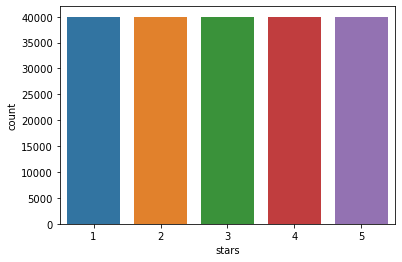

In [23]:
sns.countplot(x=df_base['stars'])
plt.show()

### Podemos ver que estan balanceados a cuarenta mil instancias cada star

### Veremos algun comentario al azar y los titulos que mas se repiten 

In [24]:
index_random = np.random.randint(0,5000)
review = df_base.review_body.iloc[index_random]
print(index_random, review)

751 Lo iba a usar solo para el hospital cuando diese a luz, y la calidad es tan mal, que se descosió y rompió el mismo día. Por lo tanto lo he tenido que tirar con 1 solo uso.


In [25]:
print(index_random, df_base.stars.iloc[index_random,])

751 1


In [26]:
titles_words = df_base.groupby('review_title')['review_title'].count()
titles_words = titles_words.sort_values(ascending=False)
titles_words.head(20)

review_title
Bien                             1952
Perfecto                         1768
Buen producto                    1484
Regular                          1283
Buena compra                     1206
Mala calidad                     1040
Genial                            850
Correcto                          831
Buena calidad                     801
Bueno                             676
Muy bien                          621
Recomendable                      604
No funciona                       508
No lo recomiendo                  480
Muy bueno                         462
Decepción                         455
Excelente                         412
Aceptable                         400
Buena relación calidad precio     398
Cumple su función                 394
Name: review_title, dtype: int64

###  Agruparemos por categoria de producto y los ordenaremos por cantidad de estrellas

In [27]:
categorias = df_base.groupby('product_category')['product_category'].count()
categorias = categorias.sort_values(ascending=False)
categorias.head(10)

product_category
home                26962
wireless            25886
toy                 13647
sports              13189
pc                  11191
home_improvement    10879
electronics         10385
beauty               7337
automotive           7143
kitchen              6695
Name: product_category, dtype: int64

In [28]:
category_stars = pd.crosstab(index=df_base['product_category'],
            columns=df_base['stars'], margins=True)

In [29]:
category_stars

stars,1,2,3,4,5,All
product_category,,,,,,
apparel,1273,1205,1200,1131,928,5737
automotive,1515,1389,1485,1441,1313,7143
baby_product,830,965,1056,999,1031,4881
beauty,1546,1527,1539,1302,1423,7337
book,659,896,998,1106,1605,5264
camera,536,564,604,683,642,3029
digital_ebook_purchase,182,318,443,460,440,1843
drugstore,1117,1088,1101,1034,1173,5513
electronics,2402,2188,1902,1961,1932,10385


In [30]:
category_stars_high = category_stars.sort_values([5],ascending=False)
category_stars_high.head(10)

stars,1,2,3,4,5,All
product_category,,,,,,
All,40000,40000,40000,40000,40000,200000
home,5391,5542,5477,5309,5243,26962
wireless,6283,5684,4797,4606,4516,25886
toy,2503,2713,2965,2639,2827,13647
sports,2438,2551,2828,2860,2512,13189
pc,2220,2149,1988,2379,2455,11191
home_improvement,2162,1987,2188,2375,2167,10879
electronics,2402,2188,1902,1961,1932,10385
book,659,896,998,1106,1605,5264


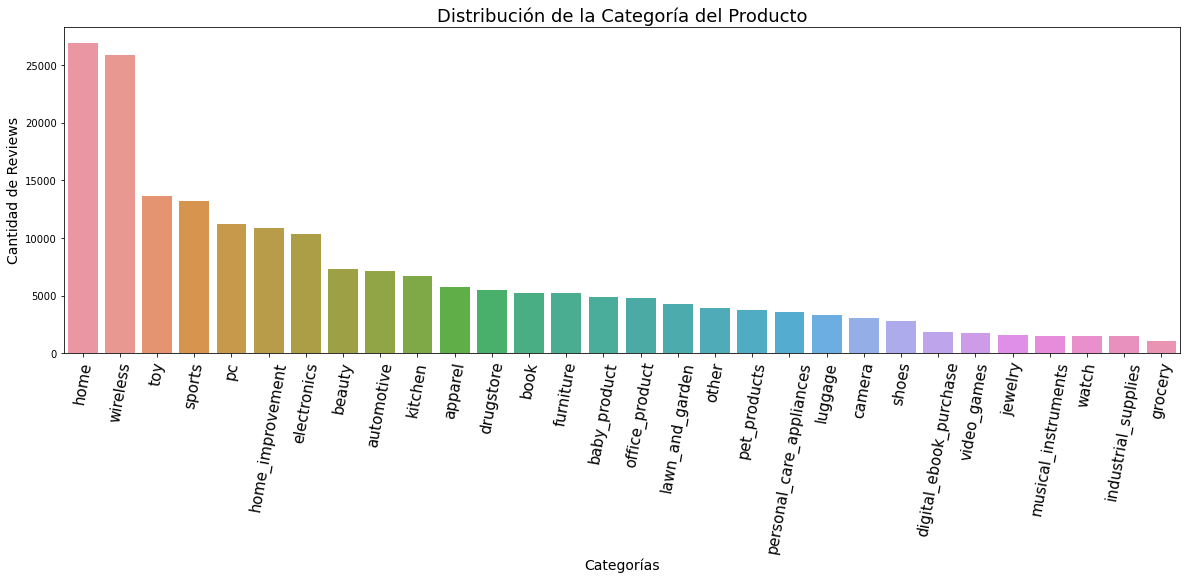

In [31]:
#Distribución de la variable producto_category
plt.subplots(figsize=(20,6))
sns.countplot(data=df_base, x=df_base.product_category, order = df_base.product_category.value_counts().index)
plt.title('Distribución de la Categoría del Producto', fontsize=18)
plt.xlabel('Categorías', fontsize=14)
plt.ylabel('Cantidad de Reviews', fontsize=14)
plt.xticks(rotation=80, fontsize=15)
plt.show()

### Aqui podemos ver que las categorias con mas reviews son wireless y home con mas de 25000 reviews, mientras que las demas no superan los 15000 reviews

### Graficamos el promedio de estrellas por categoria

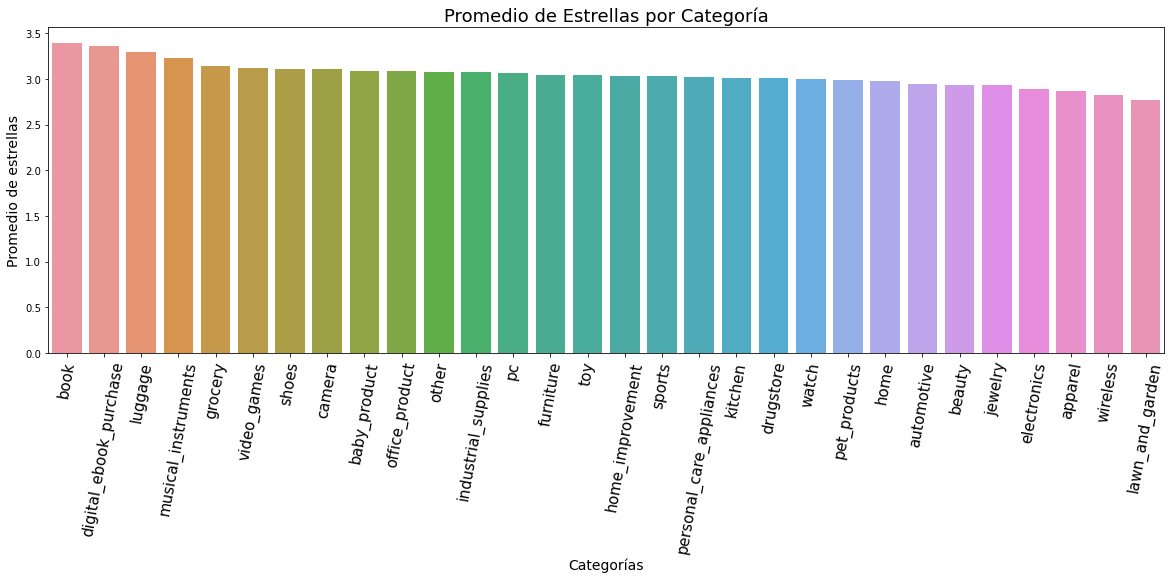

In [32]:
#Promedio de estrellas por categoría 
data_avg = df_base.stars.groupby([df_base['product_category']]).mean().reset_index(name='stars_avg')
data_avg = data_avg.sort_values(by='stars_avg', ascending=False).reset_index()
data_avg = data_avg.drop(columns=['index'])

plt.subplots(figsize=(20,6))
sns.barplot(data=df_base, x=data_avg.product_category, y=data_avg.stars_avg)
plt.title('Promedio de Estrellas por Categoría', fontsize=18)
plt.xlabel('Categorías', fontsize=14)
plt.ylabel('Promedio de estrellas', fontsize=14)
plt.xticks(rotation=80, fontsize=15)
plt.show()

### Aqui podemos ver que las categorias con mayor promedio de estrellas son digital ebook purchase y book, y que todas las categorias rondan entre 2.5-3.5 

## Veremos cuales son las palabras con mayor frecuencia en los comentarios, para eso usamos la funcion tokenize, limpiamos el texto con expresiones regulares,quitamos las stopwords (para esto usaremos las stopwords de nltk en espanol), llevamos todo a minuscula y armamos una lista

In [33]:
from nltk.corpus import stopwords

In [35]:
stopwords = nltk.corpus.stopwords.words('spanish')

In [36]:
# stopwords_es = set(stopwords.words('spanish'))

In [37]:
#Considermos incluir al listado de stopwords de nltk algunas palabras sin su acento.
stopwords_sin_acentos =  ['si', 'tambien', 'que', 'el', 'mio', 'mia', 'mios', 'mias', 'estas', 'esta', 'estamos', 'estais', 'estan', 'esta', 'estes', 
                         'esteis', 'esten', 'estare', 'estaras', 'estara', 'estareis', 'estaran', 'estaria', 'estarias', 'estariamos', 'estariais', 
                         'estarian', 'estuvieramos', 'estuviesemos', 'habeis',  'hayais','habre', 'habras', 'habra', 'habreis', 'habran',
                         'habria', 'habrias', 'habriamos', 'habriais', 'habrian', 'habia', 'habias', 'habiamos', 'habiais', 'habian', 'hubieramos', 
                         'hubiesemos', 'seais', 'sere', 'seras', 'sera', 'sereis', 'seran', 'seria', 'serias', 'seriamos', 'seriais', 'serian', 
                         'eramos', 'fueramos','fuesemos', 'teneis', 'tengais', 'tendre', 'tendras', 'tendra', 'tendreis', 'tendran', 'tendria', 'tendrias',
                         'tendriamos', 'tendriais', 'tendrian', 'tenia', 'tenias', 'teniamos', 'teniais', 'tenian', 'tuvieramos', 'tuviesemos']

In [38]:
#Definimos nuevas stopwords
stopwords_es = stopwords + stopwords_sin_acentos

### Dividiremos el dataset en funcion a las estrellas de los comentarios para ver la palabras con mayor frecuencia en cada uno

In [39]:
ds_onestar = df_base[df_base.stars==1]
ds_twostar = df_base[df_base.stars==2]
ds_threestar = df_base[df_base.stars==3]
ds_fourstar = df_base[df_base.stars==4]
ds_fivestar = df_base[df_base.stars==5]

## Una estrella

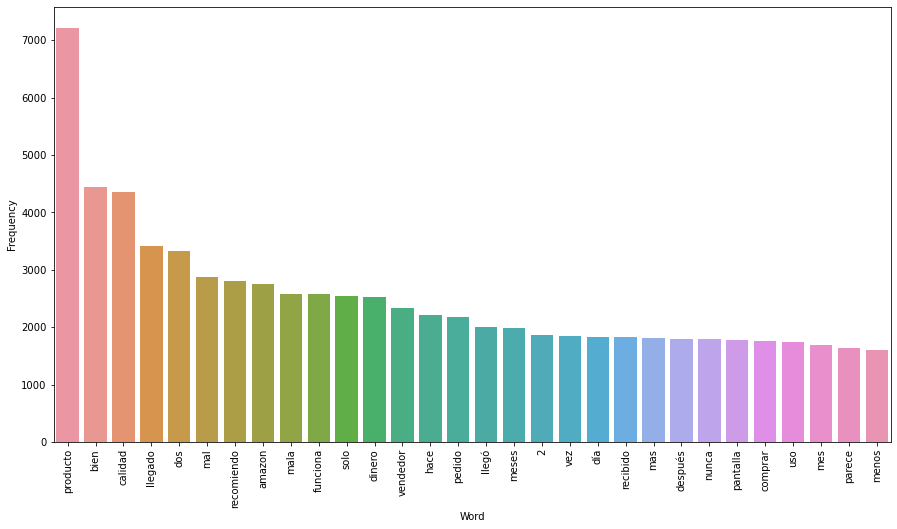

In [41]:
from nltk.tokenize import RegexpTokenizer
onestar = []
for i in range(ds_onestar.shape[0]):
    review = ds_onestar.review_body.iloc[i] #seleccionar el comentario
    review = review.lower()
    review = RegexpTokenizer('\w+').tokenize(review) # Tokenizar con RegexpTokenizer
    review = [palabra for palabra in review if not palabra in stopwords_es] # Filtrar por stopwords
    onestar.append(review) #agregar el resultado a la lista
import itertools
from itertools import chain
df_one = list(itertools.chain(*onestar))
freqr = nltk.FreqDist(palabra for palabra in df_one)
df_one = pd.DataFrame(list(freqr.items()), columns = ["Word","Frequency"])
df_one=df_one.sort_values('Frequency', ascending=False)
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_one.iloc[:30].Word, y = df_one.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

## Dos estrellas

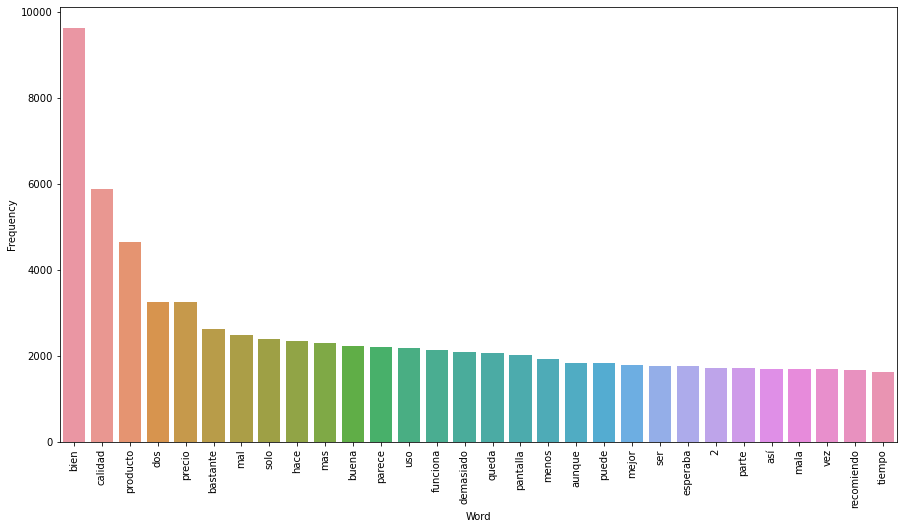

In [42]:
from nltk.tokenize import RegexpTokenizer
twostar = []
for i in range(ds_twostar.shape[0]):
    review = ds_twostar.review_body.iloc[i] #seleccionar el comentario
    review = review.lower()
    review = RegexpTokenizer('\w+').tokenize(review) # Tokenizar con RegexpTokenizer
    review = [palabra for palabra in review if not palabra in stopwords_es] # Filtrar por stopwords
    twostar.append(review) #agregar el resultado a la lista
import itertools
from itertools import chain
df_two = list(itertools.chain(*twostar))
freqr = nltk.FreqDist(palabra for palabra in df_two)
df_two = pd.DataFrame(list(freqr.items()), columns = ["Word","Frequency"])
df_two=df_two.sort_values('Frequency', ascending=False)
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_two.iloc[:30].Word, y = df_two.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

## Tres estrellas

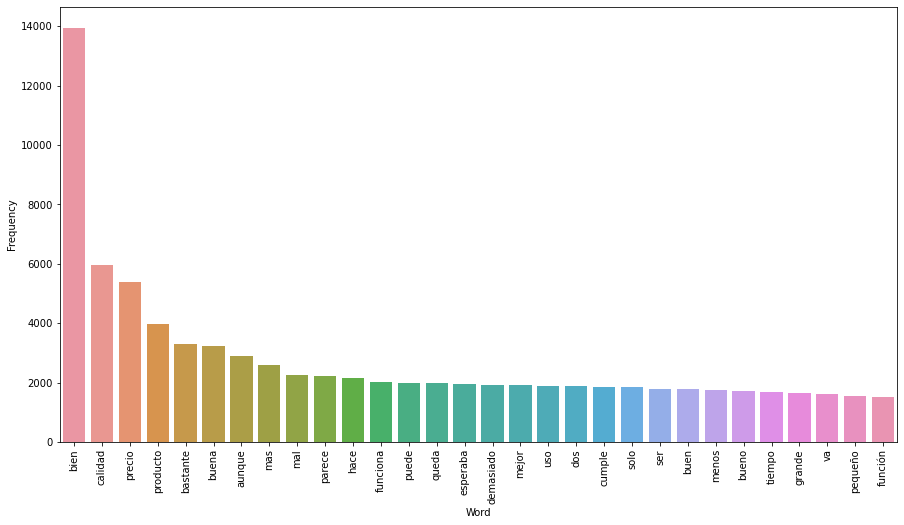

In [43]:
from nltk.tokenize import RegexpTokenizer
threestar = []
for i in range(ds_threestar.shape[0]):
    review = ds_threestar.review_body.iloc[i] #seleccionar el comentario
    review = review.lower()
    review = RegexpTokenizer('\w+').tokenize(review) # Tokenizar con RegexpTokenizer
    review = [palabra for palabra in review if not palabra in stopwords_es] # Filtrar por stopwords
    threestar.append(review) #agregar el resultado a la lista
import itertools
from itertools import chain
df_three = list(itertools.chain(*threestar))
freqr = nltk.FreqDist(palabra for palabra in df_three)
df_three = pd.DataFrame(list(freqr.items()), columns = ["Word","Frequency"])
df_three=df_three.sort_values('Frequency', ascending=False)
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_three.iloc[:30].Word, y = df_three.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

## Cuatro estrellas

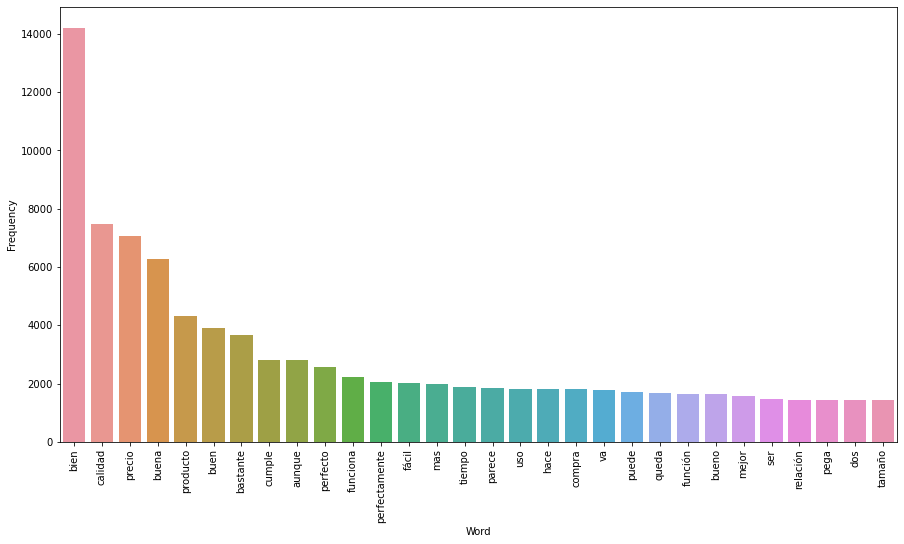

In [44]:
from nltk.tokenize import RegexpTokenizer
fourstar = []
for i in range(ds_fourstar.shape[0]):
    review = ds_fourstar.review_body.iloc[i] #seleccionar el comentario
    review = review.lower()
    review = RegexpTokenizer('\w+').tokenize(review) # Tokenizar con RegexpTokenizer
    review = [palabra for palabra in review if not palabra in stopwords_es] # Filtrar por stopwords
    fourstar.append(review) #agregar el resultado a la lista
import itertools
from itertools import chain
df_four = list(itertools.chain(*fourstar))
freqr = nltk.FreqDist(palabra for palabra in df_four)
df_four = pd.DataFrame(list(freqr.items()), columns = ["Word","Frequency"])
df_four=df_four.sort_values('Frequency', ascending=False)
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_four.iloc[:30].Word, y = df_four.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

## Cinco estrellas

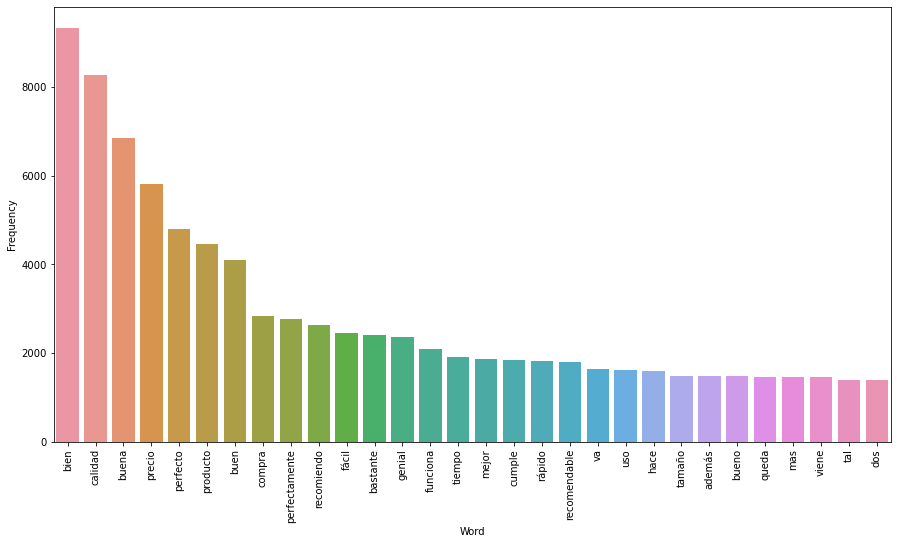

In [45]:
from nltk.tokenize import RegexpTokenizer
fivestar = []
for i in range(ds_fivestar.shape[0]):
    review = ds_fivestar.review_body.iloc[i] #seleccionar el comentario
    review = review.lower()
    review = RegexpTokenizer('\w+').tokenize(review) # Tokenizar con RegexpTokenizer
    review = [palabra for palabra in review if not palabra in stopwords_es] # Filtrar por stopwords
    fivestar.append(review) #agregar el resultado a la lista
import itertools
from itertools import chain
df_five = list(itertools.chain(*fivestar))
freqr = nltk.FreqDist(palabra for palabra in df_five)
df_five = pd.DataFrame(list(freqr.items()), columns = ["Word","Frequency"])
df_five=df_five.sort_values('Frequency', ascending=False)
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_five.iloc[:30].Word, y = df_five.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

## Procedemos a lematizar y stemizar los comentarios para luego modelar

### Importamos librerias

In [46]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
from unicodedata import normalize
from nltk.corpus import wordnet as wn
from nltk.util import ngrams
from nltk.stem import SnowballStemmer
spanish_stemmer = SnowballStemmer('spanish')
nlp = spacy.load("es_core_news_sm")

### Concatemos las columnas de titulos, comentarios y categoria de producto para trabajar, a esta variables la llamamos "text_concat"

In [47]:
df_base["text_concat"] = df_base["review_title"] + " " + df_base["review_body"] + " " + df_base["product_category"]

In [48]:
df_base.head()

,index,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text_concat
0,0,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,television Nevir Nada bueno se me fue ka panta...
1,1,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,Dinero tirado a la basura con esta compra Horr...
2,2,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,solo llega una unidad cuando te obligan a comp...
3,3,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,PRODUCTO NO RECIBIDO. No entro en descalificar...
4,4,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,Devuelto Llega tarde y co la talla equivocada ...


## STEMMING

### Aqui usamos expresiones regulares para limpiar el texto en espanol, lo llevamos a minusculas, tokenizamos, quitamos aquellas que tienen menos de dos palabras, filtramos las stopwords y stemizamos con la funcion spanish_stemmer (esto lo realiza con SnowballStemmer) y al resultado lo dejamos en una lista

In [49]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega el Stemming a cada uno
review_list=[]

for coment in df_base.text_concat:
    # Limpieza
    coment=re.sub("\[.*?¿\]\%", ' ',str(coment))   #"[^a-zA-Z]"," "
    coment=re.sub(r'[0-9]+', '',str(coment))
    coment=re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", coment), 0, re.I)
    #coment=normalize( 'NFC', coment)
    coment=coment.replace(",","")
    coment=coment.strip()
    
    # Pasamos todo a minúsculas
    coment=coment.lower()
    
    # Tokenizamos para separar las palabras del titular
    coment= nltk.word_tokenize(coment)
    
    # Eliminamos las palabras de menos de 3 letras
    coment = [palabra for palabra in coment if len(coment)>2]
    
    # Sacamos las Stopwords
    coment = [palabra for palabra in coment if not palabra in stopwords_es]
    
    ## Hasta acá Normalizamos, ahora a stemmizar

    coment = [spanish_stemmer.stem(palabra) for palabra in coment]

    # Por ultimo volvemos a unir el titular
    coment = " ".join(coment)
    
    # Vamos armando una lista con todos los titulares
    review_list.append(coment)

### Creamos la columna con el texto limpio, la llamamos coment_stem

In [51]:
df_base["coment_stem"] = review_list

In [52]:
df_base

,index,product_id,reviewer_id,stars,review_body,review_title,language,product_category,text_concat,coment_stem
0,0,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics,television Nevir Nada bueno se me fue ka panta...,television nev buen ka pantall men mes recib r...
1,1,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics,Dinero tirado a la basura con esta compra Horr...,diner tir basur compr horribl compr sab ingles...
2,2,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore,solo llega una unidad cuando te obligan a comp...,sol lleg unid oblig compr dos oblig compr dos ...
3,3,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless,PRODUCTO NO RECIBIDO. No entro en descalificar...,product recib . entro descalific vendedor sol ...
4,4,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes,Devuelto Llega tarde y co la talla equivocada ...,devuelt lleg tard co tall equivoc sho
...,...,...,...,...,...,...,...,...,...,...
199995,199995,product_es_0317036,reviewer_es_0643604,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,es,electronics,Tal y como se describe Mando funciona perfecta...,tal describ mand funcion perfect cumpl tod fun...
199996,199996,product_es_0622919,reviewer_es_0466173,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,es,electronics,Funciona perfectamente Compré la batería con c...,funcion perfect compr bateri ciert reticent re...
199997,199997,product_es_0358101,reviewer_es_0330744,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,es,apparel,Buena calidad. Buena calidad. Satisfecha con l...,buen calid . buen calid . satisfech compr . ap...
199998,199998,product_es_0788855,reviewer_es_0694290,5,Perfecto para el cumple de mi hijo,Recomendado,es,toy,Recomendado Perfecto para el cumple de mi hijo...,recomend perfect cumpl hij toy


### Eliminamos las columnas que no son de interes

In [53]:
dataset_stem=df_base.drop(columns=["product_category","language","product_id","reviewer_id"])

### Ahora procederemos a vectorizar, elegimos TF IDF ya que nos dio mejores resultados que Count Vectorizer, tambien decidimos usar ngram range de 1,2 para que tome palabras compuestas como buena calidad, mala calidad, etc.

In [54]:
list_titulos = list(dataset_stem['coment_stem'].values)
stars = dataset_stem['stars'].values

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Usaremos solo las 5000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=5000

# Es decir que cada instancia tendrá 5000 features
#cou_vec=CountVectorizer(max_features=max_features, ngram_range=(1, 2),stop_words=stopwords_es) # stop_words="english" , ngram_range=(1, 2)
vectorizer = TfidfVectorizer(max_features=max_features,ngram_range=(1, 2),stop_words=stopwords_es,max_df=0.85)

In [56]:
matriz_titulos = vectorizer.fit_transform(list_titulos)

# Tomamos las palabras
all_words = vectorizer.get_feature_names()

# Vizualizamos las 100 primeras palabras
print("100primeras palabras: ",all_words[0:100])

100primeras palabras:  ['abaj', 'abiert', 'aboll', 'abon', 'abra', 'abre', 'abren', 'abres', 'abri', 'abrig', 'abril', 'abrir', 'abrir caj', 'abrir cerr', 'abrir paquet', 'abrirl', 'absolut', 'absorb', 'absurd', 'abuel', 'abult', 'aburr', 'acab', 'acab buen', 'acab compr', 'acab lleg', 'acab mal', 'acab recib', 'acab romp', 'acas', 'acced', 'acces', 'accesori', 'accion', 'aceit', 'acept', 'acept preci', 'acer', 'acer inoxid', 'acerc', 'acert', 'aciert', 'aclar', 'acolch', 'acompan', 'acondicion', 'aconsej', 'aconsej compr', 'acopl', 'acopl bien', 'acopl perfect', 'acord', 'acord preci', 'acostumbr', 'activ', 'actu', 'actual', 'actualiz', 'actualizacion', 'acuari', 'acuerd', 'acumul', 'ad', 'adapt', 'adapt bien', 'adapt perfect', 'adaptacion', 'adecu', 'adel', 'adem', 'adem lleg', 'adem pued', 'adem ser', 'adem vien', 'adher', 'adherent', 'adhes', 'adhier', 'adhier bien', 'adi', 'adicional', 'adjunt', 'adjunt fot', 'admit', 'adolescent', 'ador', 'adorn', 'adquir', 'adquiri', 'adult', 'a

In [57]:
matriz_titulos.toarray().astype("float16") # Pasamos a float 16 porque sino no figura un error por la memoria

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)

# MACHINE LEARNING

## Librerias

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

## Modelos : Para la clasificacion se realizara un modelo de arbol de decision como benchmark, y luego LinearSVC, Random forest y Regresion Logistica

## Metricas : Seleccionamos la metrica accuracy y veremos la matriz de confusion
Para justificar el desempeño de nuestros modelos se elije como métrica el `accuracy` ya que contamos con un dataset cuyas clases están perfectamente balanceadas. Entonces, calcularemos del total de los comentarios cuántos han sido clasificados en la clase correcta, y esto nos bastará para saber si el modelo está clasificando bien o no. Para ver la clasificación por estrellas utilizaremos la matriz de confusion, para asi saber como clasifica en cada estrella.

Definimos la funcion para realizar la matriz de confusion

In [61]:
def confusion(y_test,y_pred):
    names=['Una','Dos','Tres','Cuatro','Cinco']
    cm=confusion_matrix(y_test,y_pred)
    f,ax=plt.subplots(figsize=(5,5))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

## Modelamos tomando la matriz como X y star como Y. Usamos train_test_split para dividir el dataset y entrenarlo, utilizaremos el 30% del dataset para testear y se agrega el parámetro `stratify` para asegurar un equilibrio en la distribución de las clases, en este caso la cantidad de estrellas

In [62]:
x = matriz_titulos.toarray()
y = stars

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

## Procederemos a realizar los diferentes modelos

## ARBOL DE DECISION (BENCHMARK)

In [53]:
tree = DecisionTreeClassifier(max_depth = 30, random_state=42)
tree.fit(xtrain,ytrain)
print("acc: ",tree.score(xtest,ytest))

acc:  0.40936666666666666


## MODELOS

In [65]:
def seleccion_modelo(xtrain, xtest, ytrain, ytest):
    modelos=[LinearSVC(random_state=42),
            RandomForestClassifier(n_estimators = 80, random_state=42),
            LogisticRegression(random_state=42, max_iter=1000, multi_class= 'multinomial')]
    nombre_modelo = ['LinearSVC','Random Forest','Regresión Logística']
    diccionario_modelos = {}
    for i,modelo in enumerate(modelos):
        modelo.fit(xtrain, ytrain)
        y_pred = modelo.predict(xtest)
        print('Modelo:', nombre_modelo[modelos.index(modelo)])
        print('acc :  ', accuracy_score(ytest, y_pred))
        confusion(ytest,y_pred)
        diccionario_modelos[i]=modelo
    return diccionario_modelos

Modelo: LinearSVC
acc :   0.5150333333333333


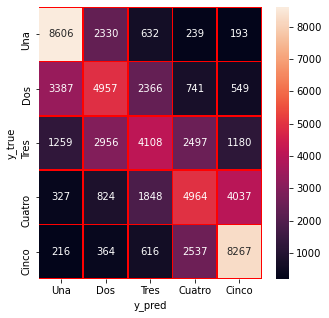

Modelo: Random Forest
acc :   0.4943166666666667


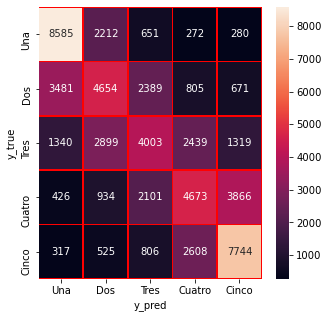

Modelo: Regresión Logística
acc :   0.5248833333333334


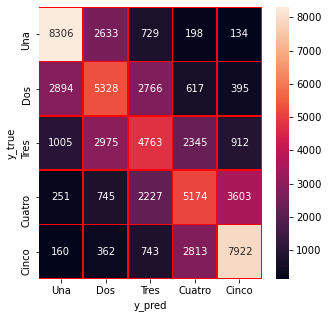

In [66]:
modelo = seleccion_modelo(xtrain, xtest, ytrain, ytest)

## Veremos para el modelo Random Forest la importancia de features y saber que utiliza para predecir

In [67]:
rf = modelo[1]

C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


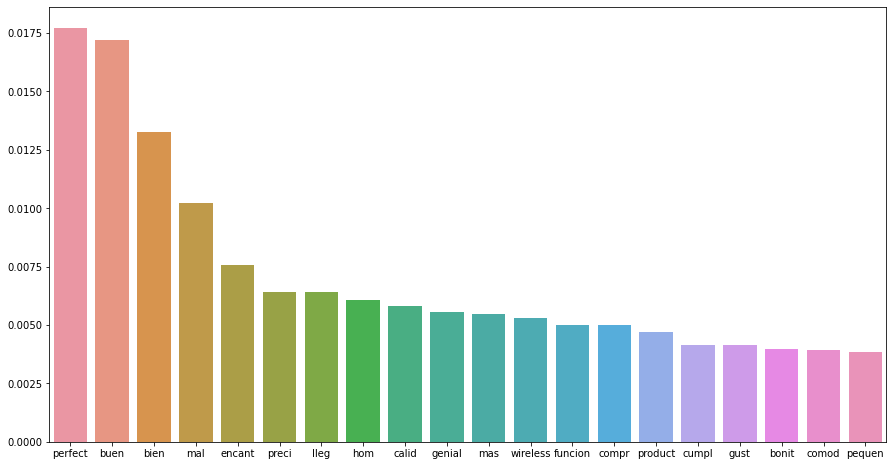

In [68]:
# Le preguntamos la importancia de cada feature (cada palabra)
importances = rf.feature_importances_
# Tomamos la lista de palabras
all_words = vectorizer.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices]
selected_importances = importances[indices]

# Por ultimo graficamos
plt.figure(figsize = (15,8))
sns.barplot(selected_columns, selected_importances)
plt.show()

En el grafico podemos observar los features con mayor importancia, y cumple con las expectativas que tenia de las palabras mas importantes

## OPTIMIZACION DE HIPERPARAMETROS

## Haremos la optimizacion de hiperparametros de estos modelos con Randomized Search, y un cross validation de 3 folds

In [4]:
model_rf = RandomForestClassifier()
model_lsvc = LinearSVC()
model_lr = LogisticRegression()

Random Forest

In [47]:
model_rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [48]:
param_dist_rf = {'n_estimators': [0,20,40,60,80,100]
                   ,'max_depth': [70]
                   ,'random_state':[42]
              }

In [49]:
rf_random = RandomizedSearchCV(model_rf, param_dist_rf, cv=3)
search_rf = rf_random.fit(xtrain.astype("float16"), ytrain)
mejor_rf = search_rf.best_params_

C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\ensemble\_forest.py", line 348, in fit
    self._validate_estimator()
  File "C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\ensemble\_base.py", line 134, in _validate_estimator
    raise ValueError("n_estimators must be greater

In [50]:
mejor_rf

{'random_state': 42, 'n_estimators': 100, 'max_depth': 70}

In [51]:
rf_model = search_rf.best_estimator_

In [52]:
print("acc: ",rf_model.score(xtest,ytest))

acc:  0.4951


### Podemos observar que la metrica mejora levemente

LINEAR SVC

In [53]:
model_lsvc.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

In [54]:
param_dist_lsvc = {'penalty': ['l1', 'l2'],
              'C': [1,2,4,6,8,10],
              }

In [55]:
lsvc_random = RandomizedSearchCV(model_lsvc, param_dist_lsvc, cv=3)

In [56]:
search_lsvc= lsvc_random.fit(xtrain.astype("float16"), ytrain)

C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s, '
ValueError: Unsup

In [57]:
mejor_lsvc = search_lsvc.best_params_

In [58]:
mejor_lsvc

{'penalty': 'l2', 'C': 1}

In [59]:
print("acc: ",search_lsvc.score(xtest,ytest))

acc:  0.5150333333333333


### Podemos observar que la metrica queda practicamente igual

Regresion logistica

In [60]:
model_lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [61]:
param_dist_lr = {'penalty': ['l1', 'l2'],
              'max_iter': [1000, 1500],
              'C': [1,2,4,6,8,10]              
              }

In [63]:
lr_random = RandomizedSearchCV(model_lr, param_dist_lr, cv=3)
search_lr= lr_random.fit(xtrain, ytrain)

C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Lucas\miniconda3\env

In [64]:
mejor_lr = search_lr.best_params_

In [65]:
mejor_lr

{'penalty': 'l2', 'max_iter': 1500, 'C': 6}

In [66]:
print("acc: ",search_lr.score(xtest,ytest))

acc:  0.5183166666666666


### Podemos observar que la metrica no aumenta

## LEMMATIZATION

### Aqui usamos expresiones regulares para limpiar el texto en espanol, lo llevamos a minusculas, tokenizamos, quitamos aquellas que tienen menos de dos palabras, filtramos las stopwords y lemmatizamos con la funcion _lemma de spicy, al resultado lo dejamos en una lista

In [67]:
# Recorremos todos los titulos y le vamos aplicando la Normalizacion y luega lematizacion a cada uno
review_list_lem=[]

for coment_lem in df_base.text_concat:
    # Limpieza
    
    coment_lem=re.sub("\[.*?¿\]\%", ' ',str(coment_lem))   #"[^a-zA-Z]"," "
    coment_lem=re.sub(r'[0-9]+', '',str(coment_lem))
    coment_lem=re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize( "NFD", coment_lem), 0, re.I)
    #coment=normalize( 'NFC', coment)
    coment_lem=coment_lem.replace(",","")
    coment_lem=coment_lem.strip()
    
    # Pasamos todo a minúscula
    coment_lem=coment_lem.lower()
    # Tokenizamos para separar las palabras del titular
    coment_lem= nltk.word_tokenize(coment_lem)
    
     # Eliminamos las palabras de menos de 3 letras
    coment_lem = [palabra for palabra in coment_lem if len(coment_lem)>2]
    
    # Sacamos las Stopwords
    coment_lem = [palabra for palabra in coment_lem if not palabra in stopwords_es]
    
    ## Hasta acá Normalizamos, ahora a lematizar
    coment_lem = " ".join(coment_lem)
    #coment = [nlp(str(palabra)) for palabra in coment]
    coment_lem = nlp(str(coment_lem))
    # Aplicamos la funcion para buscar la raiz de las palabras
    coment_lem = [palabra.lemma_ for palabra in coment_lem]
    #coment =  stemmer.stem(coment)

    # Por ultimo volvemos a unir el titular
    coment_lem = " ".join(coment_lem)
    
    # Vamos armando una lista con todos los titulares
    review_list_lem.append(coment_lem)

### Creamos la columna con el texto limpio, la llamamos coment_lem

In [68]:
df_base["coment_lem"] = review_list_lem

In [69]:
dataset_lem=df_base.drop(columns=["product_category","language","product_id","reviewer_id","coment_stem"])

In [70]:
dataset_lem

,index,stars,review_body,review_title,text_concat,coment_lem
0,0,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,television Nevir Nada bueno se me fue ka panta...,television nevir bueno ka pantalla menos mesar...
1,1,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,Dinero tirado a la basura con esta compra Horr...,dinero tirar basura comprar horrible comprar s...
2,2,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,solo llega una unidad cuando te obligan a comp...,solo llegar unidad obligar comprar do obligar ...
3,3,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,PRODUCTO NO RECIBIDO. No entro en descalificar...,producto recibir . entrar descalificar vendedo...
4,4,1,Llega tarde y co la talla equivocada,Devuelto,Devuelto Llega tarde y co la talla equivocada ...,devolver llegar tardar co tallar equivocar shoes
...,...,...,...,...,...,...
199995,199995,5,Mando funciona perfectamente y cumple con toda...,Tal y como se describe,Tal y como se describe Mando funciona perfecta...,tal describir mandar funcionar perfectamente c...
199996,199996,5,"Compré la batería con cierta reticencia, pero ...",Funciona perfectamente,Funciona perfectamente Compré la batería con c...,funcionar perfectamente comprar bateria cierto...
199997,199997,5,Buena calidad. Satisfecha con la compra.,Buena calidad.,Buena calidad. Buena calidad. Satisfecha con l...,bueno calidad . bueno calidad . satisfacer com...
199998,199998,5,Perfecto para el cumple de mi hijo,Recomendado,Recomendado Perfecto para el cumple de mi hijo...,recomendar perfecto cumplir hijo toy


### Ahora procederemos a vectorizar, elegimos TF IDF ya que nos dio mejores resultados que Count Vectorizer, tambien decidimos usar ngram range de 1,2 para que tome palabras compuestas como buena calidad, mala calidad.

In [71]:
list_titulos = list(dataset_lem['coment_lem'].values)
stars = dataset_lem['stars'].values

In [72]:
# Usaremos solo las 5000 palabras con mas frecuencia en todo el corpus para generar los vectores
max_features=5000

# Es decir que cada instancia tendrá 5000 features
#cou_vec=CountVectorizer(max_features=max_features, ngram_range=(1, 2),stop_words=stopwords_es) # stop_words="english" , ngram_range=(1, 2)
vectorizer = TfidfVectorizer(max_features=max_features,ngram_range=(1, 2),stop_words=stopwords_es,strip_accents=ascii)

In [73]:
matriz_titulos = vectorizer.fit_transform(list_titulos)

# Tomamos las palabras
all_words = vectorizer.get_feature_names()

# Vizualizamos las 100 primeras palabras
print("100 primeras palabras: ",all_words[0:100])

C:\Users\Lucas\miniconda3\envs\ds2\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['est', 'estuvi', 'fu', 'hab', 'habr', 'hubi', 'qu', 'ser', 'tambi', 'ten', 'tendr', 'teng', 'tuvi', 'xe1', 'xe1bamos', 'xe1is', 'xe1n', 'xe1s', 'xe9', 'xe9is', 'xe9l', 'xe9n', 'xe9ramos', 'xe9s', 'xe9semos', 'xed', 'xeda', 'xedais', 'xedamos', 'xedan', 'xedas', 'xedo', 'xedos', 'xfa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


100 primeras palabras:  ['U0001f44d', 'U0001f44e', 'abajar', 'abollar', 'abonar', 'abri', 'abrigar', 'abril', 'abrir', 'abrir caja', 'abrir cerrar', 'abrir paquete', 'abrirla', 'abrirlo', 'absolutamente', 'absoluto', 'absorber', 'abultar', 'aburrir', 'acabar', 'acabar bueno', 'acabar comprar', 'acabar llegar', 'acabar recibir', 'acaso', 'acceder', 'acceso', 'accesorio', 'accion', 'aceitar', 'aceite', 'aceptable', 'aceptable preciar', 'aceptar', 'acerar', 'acerar inoxidable', 'acercar', 'acertar', 'aclarar', 'acolchar', 'acompan', 'acondicionar', 'aconsejable', 'aconsejar', 'aconsejar comprar', 'acoplar', 'acoplar bien', 'acordar', 'acorde', 'acorde preciar', 'acostumbrar', 'activar', 'actividad', 'activo', 'actual', 'actualizacion', 'actualizar', 'acuario', 'acumular', 'adaptable', 'adaptacion', 'adaptador', 'adaptar', 'adaptar bien', 'adaptar perfectamente', 'adecuadamente', 'adecuar', 'adelantar', 'ademar', 'ademar llegar', 'ademar poder', 'ademar ser', 'ademar venir', 'adherencia', 

In [74]:
matriz_titulos.toarray().astype("float16") # Pasamos a float 16 porque sino no figura un error por la memoria

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)

## Modelamos tomando la matriz como X y star como Y. Usamos train_test_split para dividir el dataset y entrenarlo

In [79]:
x = matriz_titulos.toarray()
y = stars

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

## Entrenamos con el texto lemmatizado

## ARBOL DE DECISION (BENCHMARK)

In [76]:
tree = DecisionTreeClassifier(max_depth = 30, random_state=42)
tree.fit(xtrain,ytrain)
print("acc: ",tree.score(xtest,ytest))

acc:  0.4088333333333333


## MODELOS

Modelo: LinearSVC
acc :   0.5165333333333333


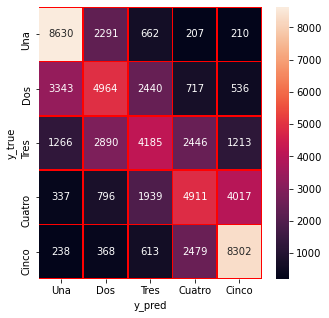

Modelo: Random Forest
acc :   0.49116666666666664


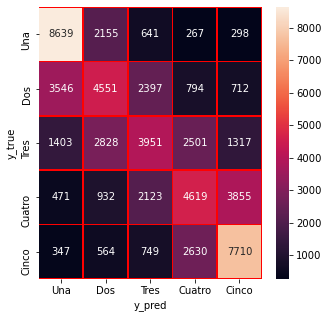

Modelo: Regresión Logística
acc :   0.5268666666666667


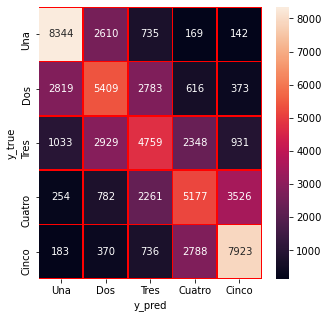

In [80]:
seleccion_modelo(xtrain, xtest, ytrain, ytest)

## Comparacion de metricas

In [70]:
metricas= [[0.4088, 0.4093],
         [0.4911, 0.4951],
         [ 0.5165, 0.5150],
          [ 0.5268, 0.5248]]

columnas = ['Acc_Lema', 'Acc_Stem'] # definimos los nombres de las columnas
filas = ['Arbol de decision(Benchmarck)', 'Random Forest', 'Linear SVC' , 'Regresion logistica'] # definimos los nombres de las filas

comparacion = pd.DataFrame(metricas, columns=columnas, index=filas)
comparacion.head()

,Acc_Lema,Acc_Stem
Arbol de decision(Benchmarck),0.4088,0.4093
Random Forest,0.4911,0.4951
Linear SVC,0.5165,0.5150
Regresion logistica,0.5268,0.5248


### Analisis de metricas : Podemos ver que los todos los modelos superaron al seleccionado como benchmark,y que con ambas maneras (Lemmatization y Stemming) se llega a resultados similares en los modelos, queda la Regresion logistica con el mejor score de accuracy que llego a 0.5268, por lo cual elegiria este modelo para trabajar
### Analisis de matrices de confusion: Podemos observar que en todos los modelos paso algo similar, que es que acierta mucho en los extremos (1 y 5) al ser tan opuestos, y que tiende a confundirse en el medio (2 ,3 y 4 estrellas)

# CONCLUSIONES Y COMENTARIOS

 A lo largo del proyecto pude aprender diferentes tecnicas y procesos como limpiar el texto quitando o dejando acentos, numeros, etc. Me parecio interesante intentar de las dos maneras (lema-stem) para ver como se comportaban los datos.
 Pude observar que las librerias son muy buenas, pero encontre complicaciones al ser el texto en espanol, lo cual seguro ira mejorando.
 
 En cuanto a los modelos, esperaba que el mejor fuese random forest para la clasificacion, y fue una sorpresa ver que predecia mejor la regresion logistica. Lo mismo con la optimizacion de los parametros, pense que mejoraria la metrica sobre todo despues de tanta espera, pero no fue bueno en este caso.
 
 En las consignas se planteaba la idea de armar una calificacion binaria (buena o mala calificacion), por el analisis de las matrices de confusiones esto ayudaria, ya que sacariamos los puntos medios que es lo que complica el modelo, pero anteriormente aprendimos que seria incorrecto ya que para darle una calificacion binaria de buena o mala deberiamos antes tener las estrellas (variable a predecir), tambien que al estar balanceado y ser 5 estrellas, quedaria muy subjetiva la eleccion de la calificacion de tres estrellas.
 
 A mejorar : Me enfocaria mas en la limpieza del texto, pude observar que un problema de la libreria para lematizar es que tiene en cuenta los acentos para unificar las palabras, por ejemplo: Abri, abrio, abrir deberian quedar como "abrir" pero al no tener acento no las toma correctamente.

Para mejorar probaria con el lematizador de la libreria Stanza, o traducir el texo a ingles con google trans (Ejemplo que encontre para guiarse: https://pypi.org/project/googletrans/) para darle el tratamiento ya que observo que las librerias son mas eficientes con el texo en ingles.
Ahora veremos como funcionaria con la opcion de usar la lematizacion de la libreria Stanza:

In [2]:
import stanza
stanza.download("es")

2021-08-02 22:45:40 INFO: Downloading default packages for language: es (Spanish)...


2021-08-02 22:45:42 INFO: File exists: C:\Users\Lucas\stanza_resources\es\default.zip.
2021-08-02 22:45:47 INFO: Finished downloading models and saved to C:\Users\Lucas\stanza_resources.


In [3]:
nlp = stanza.Pipeline(lang='es', processors='tokenize,mwt,pos,lemma')

2021-08-02 22:45:49 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |

2021-08-02 22:45:49 INFO: Use device: cpu
2021-08-02 22:45:49 INFO: Loading: tokenize
2021-08-02 22:45:49 INFO: Loading: mwt
2021-08-02 22:45:49 INFO: Loading: pos
2021-08-02 22:45:50 INFO: Loading: lemma
2021-08-02 22:45:50 INFO: Done loading processors!


In [4]:
doc = nlp("Abrir abrí abrió abrimos abrieron")

In [5]:
print(*[f'word: {word.text+" "}\tlemma: {word.lemma}' for sent in doc.sentences for word in sent.words], sep='\n')

word: Abrir 	lemma: abrir
word: abrí 	lemma: abrir
word: abrió 	lemma: abrir
word: abrimos 	lemma: abrir
word: abrieron 	lemma: abrir


Aqui podemos ver como esta libreria si lematiza bien las palabras en espanol, dejando este ejemplo en la misma palabra base que es abrir, esto acotaria las palabras importantes ya que en el trabajo algunas palabras quedaban similares despues de la lematizacion. Con esta metodologia esperaria que la metrica de accuracy alcance el 60% y que mejore la prediccion en las estrellas medias (2,3,4) que es donde mas se confunde por la similitud en las palabras. En caso de no alcanzarlo, iria por la opcion de traducir el texto a ingles con la metodologia indicada anteriormente para poder mejorar las metricas

Creo que seria interesante hacer clustering (Aprendizaje no supervisado) y armar una nube de palabras para ver si los grupos tienen relacion con la calificacion. Para esto utilizaria la libreria worldcloud. Investigando sobre como utilizar esta herramienta encontre este repositorio que me parecio de gran ayuda https://github.com/amueller/word_cloud

Tambien utilizar modelos de deep learning, por ejemplo redes neuronales para mejorar nuestras metricas, tambien otro vectorizador como por ejemplo Word2Vec.


 Debo destacar que tuve mucho costo computacional con el dataset de 200000 instancias, tardo mucho (13 hs) en entrenar los modelos y hacer la optimizacion de hiperparametros (en principio habia seleccionado 5 folds y lo baje a 3).

# REPOSITORIO GIT-HUB

https://github.com/LucasCardenas/Acamica-proyectos/blob/c5dddf63222f3fd22dcd8b0e3bb785612f135f07/Proyecto%203-%20Final.ipynb